# Diabetes Prediction using Machine Learning Algorithms: A Classification Problem

This project uses various ML classification algorithms (KNN, SVM, Decision Tree, Random Forest, XGBoost) to predict the likelihood of an individual having diabetes based on health-related parameters.

### Dataset Features Used:
- Glucose
- Blood Pressure
- Skin Thickness
- Insulin
- BMI
- Diabetes Pedigree Function
- Age


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the dataset (make sure 'diabetes.csv' is in the same folder)
df = pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploratory Data Analysis (EDA)

Let's explore the dataset to understand distributions, missing values, and correlations between features.


In [3]:
# Dataset shape and info
print("Shape of the dataset:", df.shape)
print("\nMissing values in each column:\n", df.isnull().sum())
df.describe()


Shape of the dataset: (768, 9)

Missing values in each column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[features]
y = df['Outcome']  # Target variable


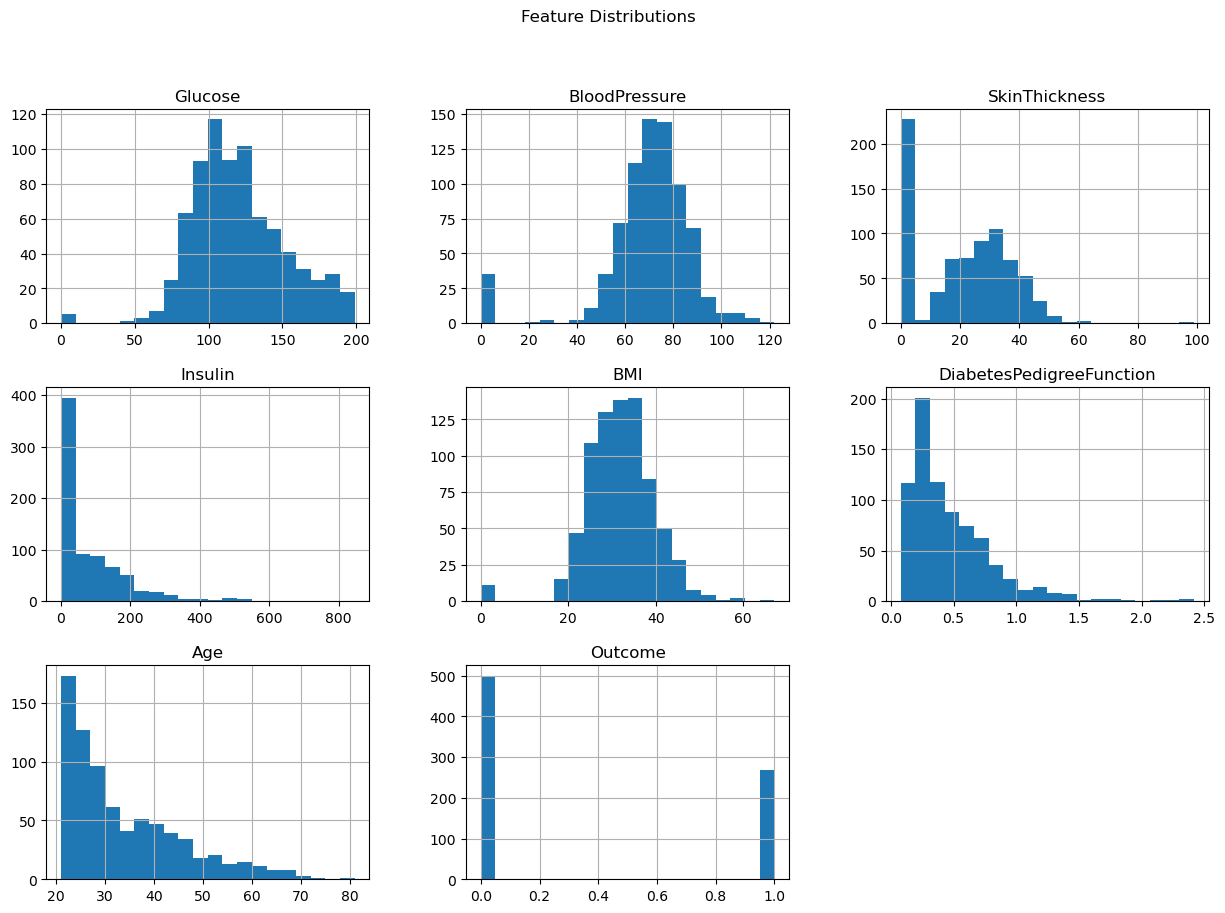

In [6]:
# Histograms of all features
import matplotlib.pyplot as plt
import seaborn as sns

df[features + ['Outcome']].hist(bins=20, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()


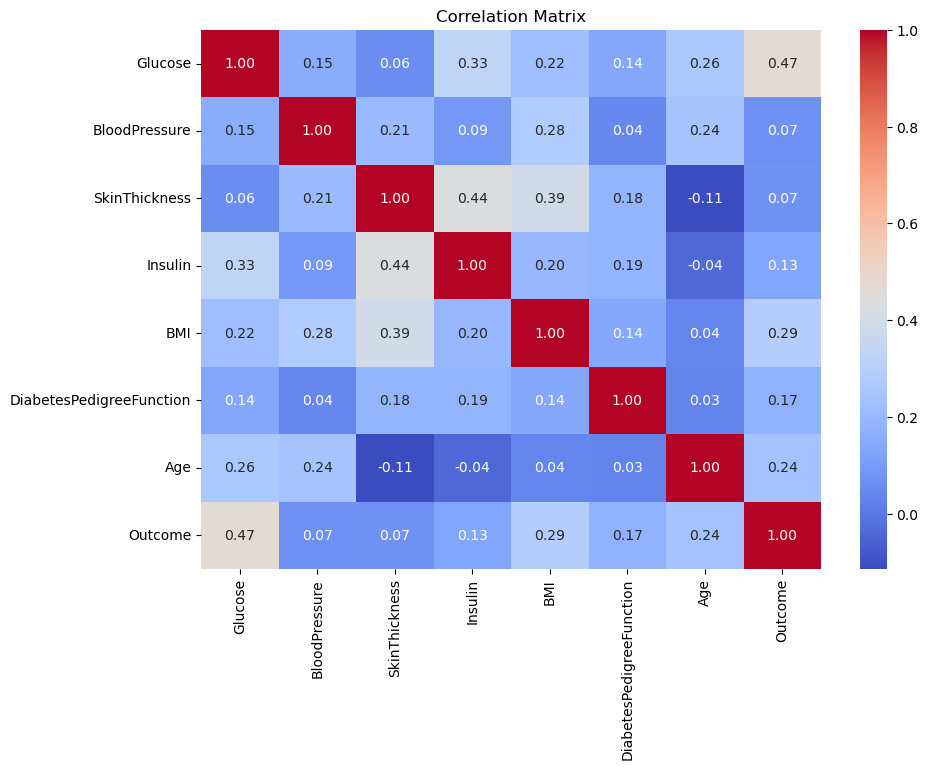

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df[features + ['Outcome']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


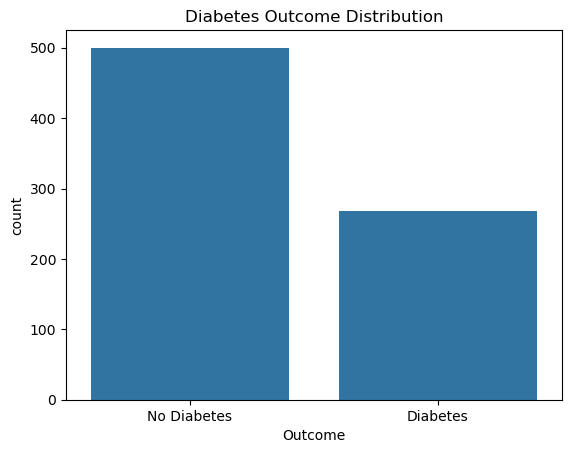

In [8]:
# Check class distribution
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Outcome Distribution")
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()


In [9]:
# Select only the 7 predictor features mentioned
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[features]
y = df['Outcome']  # Target variable


In [10]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
# Dictionary of models
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    results[name] = {'Accuracy': acc, 'AUC': auc}
    
    print(f"\n{name} Results:")
    print("Accuracy:", round(acc, 2))
    print("AUC Score:", round(auc, 2))
    print("Classification Report:\n", classification_report(y_test, y_pred))



KNN Results:
Accuracy: 0.71
AUC Score: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78        99
           1       0.60      0.53      0.56        55

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.70       154


SVM Results:
Accuracy: 0.75
AUC Score: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81        99
           1       0.67      0.60      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154


Decision Tree Results:
Accuracy: 0.71
AUC Score: 0.7
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.73      0.76        99
           1       0.

In [12]:
# Display comparison of all models
print("\n--- Model Comparison ---")
comparison_df = pd.DataFrame(results).T
comparison_df = comparison_df.sort_values(by='AUC', ascending=False)
comparison_df



--- Model Comparison ---


,Accuracy,AUC
SVM,0.753247,0.814141
Random Forest,0.746753,0.803214
XGBoost,0.707792,0.761616
KNN,0.707792,0.749036
Decision Tree,0.707792,0.700000
